## 1.Planejamento 

 - Fazer a previsão do crescimento dos procedimentos e faturamento nosmeses que duraram a quarentena

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importando e fazeendo um tratamento na base de dados

 - Importandos os daddos do Studio Biena Guedes

In [5]:
dados = pd.read_csv('https://raw.githubusercontent.com/robertferro/studio-estetica/main/dados-studio/dados_studio_biena_guedes.csv', sep=';')

In [6]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,430.0
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-26,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,650.0
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,130.0


 - Excluindo os valores nulos

In [7]:
dados=dados.dropna()

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 728
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        729 non-null    object 
 1   design_de_sobrancelhas  729 non-null    float64
 2   design_coloracao        729 non-null    float64
 3   design_coloracao_buco   729 non-null    float64
 4   buco                    729 non-null    float64
 5   brown_lamination        729 non-null    float64
 6   micropigmentacao        729 non-null    float64
 7   extensao_de_cilios      729 non-null    float64
 8   lash_lifting            729 non-null    float64
 9   limpeza_de_pele         729 non-null    float64
 10  microagulhamento        729 non-null    float64
 11  peeling_quimico         729 non-null    float64
 12  massagem_relaxante      729 non-null    float64
 13  pacote_massagem_5       729 non-null    float64
 14  drenagem_linfatica      729 non-null    fl

 - Convertendo a coluna "data_atendimento" para o formato datetime

In [9]:
dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'])

In [10]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,430.0
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-12-26,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,650.0
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,130.0


## 3. EDA

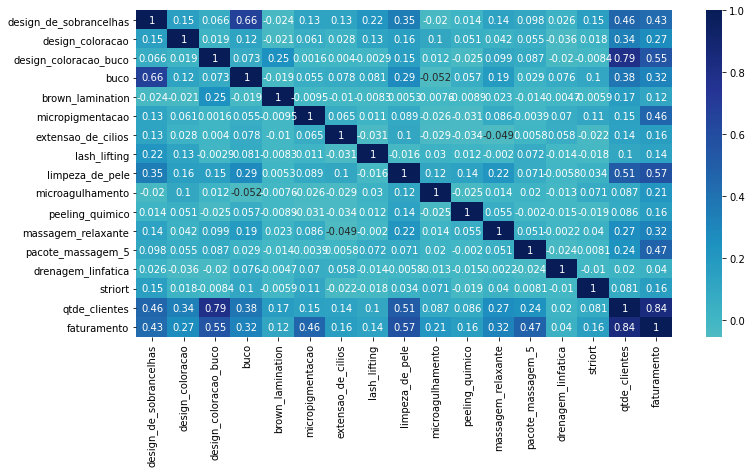

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(dados.corr(), annot=True, center=0, cmap="YlGnBu")

In [12]:
dados.corr()

,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
design_de_sobrancelhas,1.000000,0.153314,0.065894,0.664596,-0.023677,0.128832,0.125900,0.216663,0.348605,-0.020484,0.013896,0.137909,0.098465,0.025757,0.151765,0.462153,0.429694
design_coloracao,0.153314,1.000000,0.018660,0.123656,-0.020944,0.060991,0.027767,0.125295,0.155786,0.103779,0.050740,0.041875,0.054604,-0.035641,0.017704,0.336452,0.270752
design_coloracao_buco,0.065894,0.018660,1.000000,0.073108,0.251066,0.001647,0.004034,-0.002891,0.149158,0.012263,-0.025061,0.098967,0.086554,-0.019741,-0.008448,0.787625,0.550596
buco,0.664596,0.123656,0.073108,1.000000,-0.018971,0.055385,0.077546,0.080698,0.286227,-0.052425,0.056857,0.187347,0.029426,0.076048,0.104681,0.375505,0.316441
brown_lamination,-0.023677,-0.020944,0.251066,-0.018971,1.000000,-0.009498,-0.010376,-0.008259,0.005330,-0.007602,-0.008938,0.023257,-0.013859,-0.004682,-0.005864,0.171423,0.116459
micropigmentacao,0.128832,0.060991,0.001647,0.055385,-0.009498,1.000000,0.065273,0.011081,0.089359,-0.026248,-0.030859,0.085631,-0.003903,0.069534,0.110952,0.145884,0.460619
extensao_de_cilios,0.125900,0.027767,0.004034,0.077546,-0.010376,0.065273,1.000000,-0.031153,0.102152,-0.028675,-0.033712,-0.048549,0.005802,0.057842,-0.022118,0.135191,0.161542
lash_lifting,0.216663,0.125295,-0.002891,0.080698,-0.008259,0.011081,-0.031153,1.000000,-0.016134,0.029998,0.011980,-0.001954,0.072128,-0.014056,-0.017606,0.101286,0.135536
limpeza_de_pele,0.348605,0.155786,0.149158,0.286227,0.005330,0.089359,0.102152,-0.016134,1.000000,0.115299,0.139031,0.217749,0.071435,-0.005833,0.034178,0.510927,0.570612
microagulhamento,-0.020484,0.103779,0.012263,-0.052425,-0.007602,-0.026248,-0.028675,0.029998,0.115299,1.000000,-0.024699,0.014464,0.020326,-0.012937,0.071302,0.087474,0.210489


 - Agrupando os dados por mês

In [13]:
# dados = dados.set_index('data_atendimento')
# dados_por_mes=dados.resample('M').sum()
# dados_por_mes=dados.resample('M', on='data_atendimento').sum()

In [14]:
dados.loc[dados['data_atendimento'] =="2020-04-01"]

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
377,2020-04-01,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,360.0


 ## 4. Machine learning
 
 
  
   -  Definir X_train e X_test : 
       - X_train são os dados antes da pandemia 
       - X_test são os dados após a pandemia
       - x prede sao os dados durante a pandemia 

 - Definindo as amostras de treino e teste

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test= train_test_split(dados, test_size=0.25 , random_state=123)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 714 to 510
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_atendimento        546 non-null    datetime64[ns]
 1   design_de_sobrancelhas  546 non-null    float64       
 2   design_coloracao        546 non-null    float64       
 3   design_coloracao_buco   546 non-null    float64       
 4   buco                    546 non-null    float64       
 5   brown_lamination        546 non-null    float64       
 6   micropigmentacao        546 non-null    float64       
 7   extensao_de_cilios      546 non-null    float64       
 8   lash_lifting            546 non-null    float64       
 9   limpeza_de_pele         546 non-null    float64       
 10  microagulhamento        546 non-null    float64       
 11  peeling_quimico         546 non-null    float64       
 12  massagem_relaxante      546 non-null    float64 

In [18]:
train

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
714,2020-06-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,2020-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
726,2020-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,2019-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2019-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,2019-10-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,2020-09-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,550.0
365,2019-12-23,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,60.0


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 230 to 102
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_atendimento        183 non-null    datetime64[ns]
 1   design_de_sobrancelhas  183 non-null    float64       
 2   design_coloracao        183 non-null    float64       
 3   design_coloracao_buco   183 non-null    float64       
 4   buco                    183 non-null    float64       
 5   brown_lamination        183 non-null    float64       
 6   micropigmentacao        183 non-null    float64       
 7   extensao_de_cilios      183 non-null    float64       
 8   lash_lifting            183 non-null    float64       
 9   limpeza_de_pele         183 non-null    float64       
 10  microagulhamento        183 non-null    float64       
 11  peeling_quimico         183 non-null    float64       
 12  massagem_relaxante      183 non-null    float64 

In [20]:
test

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
230,2019-10-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,2019-03-12,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,760.0
332,2019-11-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,2019-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
724,2020-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2019-11-15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,430.0
529,2020-04-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,2019-04-24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,130.0
40,2019-01-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0


In [21]:
# train['design_coloracao_buco']=train['design_coloracao_buco'].apply(np.log1p)
# train['faturamento']=train['faturamento'].apply(np.log1p)

In [22]:
# test['design_coloracao_buco']=test['design_coloracao_buco'].apply(np.log1p)
# test['faturamento']=test['faturamento'].apply(np.log1p)

In [35]:
X_cols = ['design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort','qtde_clientes'
         ]
y_col = ['faturamento']

In [36]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [37]:
X_train

,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes
714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0
365,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [38]:
y_train

,faturamento
714,0.0
468,0.0
726,0.0
398,0.0
66,570.0
...,...
98,0.0
322,0.0
382,550.0
365,60.0


 - Machine learning

In [39]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [40]:
y_pred = neigh.predict(X_test)

In [41]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test.values)**2))

96.74782724435073

In [42]:
# Mean Squared Error
np.mean((y_pred-y_test.values)**2)

9360.142076502732

In [43]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

47.02732240437158

In [44]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7956109966078049

 - Triagem com outros modelos

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

1.0

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor()
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Test score 0.8202340040489604
Treinando RandomForestRegressor


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train score 0.9879893301000382
Test score 0.9175525662455121
Treinando MLPRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.7336196343522792
Test score 0.7727396675818408
Treinando XGBRegressor
[22:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9871153935675625
Test score 0.9544216332883296


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
            
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Test score 0.8301616737997993
Treinando RandomForestRegressor


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train score 0.9879319721979789
Test score 0.914400345850735
Treinando MLPRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.7498975998025035
Test score 0.7823432964316244


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test= train_test_split(dados, test_size=0.25 , random_state=123)

In [ ]:
train.info()

In [ ]:
test.info()